Инициализация класса логистической регрессии с возможностью оптимизации RMSprop

In [3]:
"""
Created on Fri Jul 15 09:02:31 2022

@author: vladislav
"""

import numpy as np

class LogisticRegression:
    def __init__(self, X):
        self.X_size = X.shape[0]
        self.X_col_size = X.shape[1]
        self.X = self.normalize(X)
        self.w = np.zeros((self.X_col_size, 1))
        self.b = 0
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def gradients(self, y,y_hat,x):
        dw = (1/self.X_size)*np.dot(x.T, (y_hat - y))
        db = (1/self.X_size)*np.sum((y_hat - y)) 
        return dw, db
    
    def loss(self, y, y_hat):
        loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss
    
    def normalize(self, X):
        m, n = X.shape
        for i in range(n):
            X = (X - X.mean(axis=0))/X.std(axis=0)
        return X
    
    def train(self, X, y, bs, epochs, lr, RMSprop):
        self.w = np.zeros((self.X_col_size,1))
        self.b = 0
        y = y.reshape(bs,1)
        x = self.normalize(X)
        
        losses = []
        
        vdw = 0
        vdb = 0
        for epoch in range(epochs):
            for i in range((self.X_size-1)//bs + 1):
                start_i = i*bs
                end_i = start_i + bs
                xb = X[start_i:end_i]
                yb = y[start_i:end_i]
                y_hat = self.sigmoid(np.dot(xb, self.w) + self.b)
                dw, db = self.gradients(yb, y_hat, xb)
            
                if RMSprop:
                    vdw = 0.9 * vdw + 0.1 * pow(dw,2)
                    vdb = 0.9 * vdb + 0.1 * pow(db,2)
                    self.w = self.w - lr * (dw / (np.sqrt(vdw) + pow(10,-4)))
                    self.b = self.b - lr * (db / (np.sqrt(vdb) + pow(10,-4)))
                else:
                    self.w -= lr*dw
                    self.b -= lr*db
                
            l = self.loss(y, self.sigmoid(np.dot(X, self.w) + self.b))
            losses.append(l)
        
        return self.w, self.b, losses
    
    def predict(self, X):
        x = self.normalize(X)
        preds = self.sigmoid(np.dot(X, self.w) + self.b)
        
        # Empty List to store predictions.
        pred_class = []
        # if y_hat >= 0.5 --> round up to 1
        # if y_hat < 0.5 --> round up to 1
        pred_class = [1 if i > 0.5 else 0 for i in preds]
        
        return np.array(pred_class)
    
    def accuracy(self, y, y_hat):
        accuracy = np.sum(y == y_hat) / len(y)
        return accuracy

Загрузка датасета ирисов, обучение модели

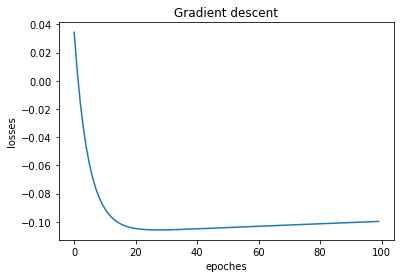

Accuracy Y_test with predictions:  0.3


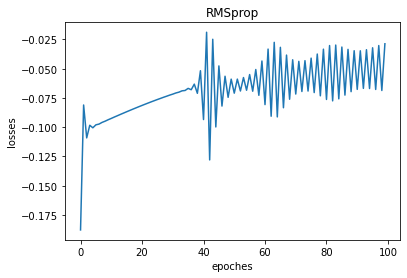

Accuracy Y_test with predictions:  1.0


In [1]:

from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris
from logistic_regression import LogisticRegression

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

irisBunch = load_iris()
data = np.c_[irisBunch.data, irisBunch.target]
columns = np.append(irisBunch.feature_names, ["target"])
irisDF = pd.DataFrame(data, columns=columns)
irisDF = irisDF[irisDF['target']!=0]

targetData = pd.get_dummies(irisDF.loc[:, irisBunch.feature_names])
Y = irisDF['target']
Y[Y==1]=0
Y[Y==2]=1
X_train, X_test, Y_train, Y_test = train_test_split(targetData, Y, test_size=0.2)

Y_train = Y_train.array
Y_test = Y_test.array

logReg = LogisticRegression(X_train)

w, b, losses = logReg.train(X_train, Y_train, X_train.shape[0], 100, 0.01, RMSprop=False)

plt.title('Gradient descent')
plt.plot(losses)
plt.ylabel('losses')
plt.xlabel('epoches')
plt.show()

pred = logReg.predict(X_test)
acc = logReg.accuracy(Y_test, pred)

print('Accuracy Y_test with predictions: ', acc)

w, b, losses = logReg.train(X_train, Y_train, X_train.shape[0], 100, 0.01, RMSprop=True)

plt.title('RMSprop')
plt.plot(losses)
plt.ylabel('losses')
plt.xlabel('epoches')
plt.show()


pred = logReg.predict(X_test)
acc = logReg.accuracy(Y_test, pred)

print('Accuracy Y_test with predictions: ', acc)

При одинаковых параметрах обучения: эпохи - 100, шаг обучения - 0.01, обучение модели градиентным спуском без оптимизации не дает необходимого результата.
С оптимизацией RMSprop модель обучена достаточно и может предсказывать на тестовой выборке с достаточной точностью.